In [1]:
# Artificial Neural Network


# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [2]:
## Part 2  - Now let's make an ANN!!

# Importing the Keras libraries and packages

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout



In [3]:
## Initialising the ANN
classifier = Sequential()

In [7]:
## Adding the input layer and the first hidden layers

classifier.add(Dense(6,kernel_initializer = 'he_uniform', activation='relu',input_dim = 11))

## Adding the Second hidden layer

classifier.add(Dense(6, kernel_initializer='he_uniform', activation='relu'))

## Adding the Output Layer

classifier.add(Dense(1, kernel_initializer='glorot_uniform',activation='sigmoid'))

In [8]:
## Compiling the ANN

classifier.compile(optimizer='Adamax', loss='binary_crossentropy', metrics=['accuracy'])


In [9]:
## Fitting the ANN to the training Set

model_history = classifier.fit(X_train,y_train, validation_split=0.33, batch_size=10, epochs=100)

Epoch 1/100
536/536 [==============================] - 5s 4ms/step - loss: 0.8110 - accuracy: 0.3735 - val_loss: 0.5231 - val_accuracy: 0.7955
Epoch 2/100
536/536 [==============================] - 2s 3ms/step - loss: 0.5218 - accuracy: 0.7881 - val_loss: 0.5032 - val_accuracy: 0.7955
Epoch 3/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4938 - accuracy: 0.8023 - val_loss: 0.4982 - val_accuracy: 0.7955
Epoch 4/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4972 - accuracy: 0.7960 - val_loss: 0.4926 - val_accuracy: 0.7955
Epoch 5/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4929 - accuracy: 0.7948 - val_loss: 0.4871 - val_accuracy: 0.7955
Epoch 6/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4828 - accuracy: 0.7989 - val_loss: 0.4818 - val_accuracy: 0.7955
Epoch 7/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4811 - accuracy: 0.7916 - val_loss: 0.4776 - val_accuracy: 0.7955

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


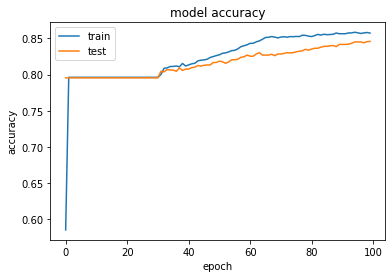

In [13]:
# list all data in history
print(model_history.history.keys())

# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


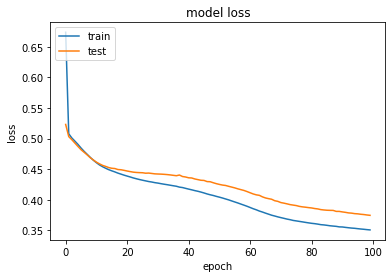

In [14]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [17]:
## Part 3 - Making the prediction and Evaluating the model

## Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

## Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm



array([[1485,  110],
       [ 201,  204]])

In [18]:
## Calculate the accuracy
from sklearn.metrics import accuracy_score
score= accuracy_score(y_pred,y_test)
score

0.8445